In [24]:
# Print current directory contents 
import os
os.chdir("/workspace/")
current_working_directory = os.getcwd()
print("Current Working Directory:", current_working_directory)

Current Working Directory: /workspace


In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import decoupler as dc

In [26]:
# Load single-cell data
adata = sc.read_h5ad('datasets/WT.h5ad')
adata


AnnData object with n_obs × n_vars = 6931 × 19788
    obs: 'consensuscall', 'n_genes', 'leiden', 'leiden_res0_25', 'leiden_res0_5', 'leiden_res0_75', 'leiden_res1', 'ps_ordered', 'dpt_pseudotime', 'subcluster', 'text_label', 'newclust'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'dendrogram_consensuscall', 'dendrogram_leiden_res0_75', 'dendrogram_ps_ordered', 'hvg', 'leiden', 'leiden_colors', 'leiden_res0_25', 'leiden_res0_25_colors', 'leiden_res0_5', 'leiden_res0_5_colors', 'leiden_res0_75', 'leiden_res0_75_colors', 'leiden_res1', 'leiden_res1_colors', 'log1p', 'neighbors', 'newclust_colors', 'pca', 'ps_ordered_colors', 'subcluster_colors', 't-test', 'text_label_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'aucell_estimate'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [27]:
# Load exclusive signatures (Tcm/Tem/Tpm vs Naive)
sigs = pd.read_csv('figures/signatures_exclusive.csv')
sigs = sigs.dropna(subset=['gene_symbol'])
net = sigs.rename(columns={'gs_name': 'source', 'gene_symbol': 'target', 'EnsemblID': 'target_id'})
net['weight'] = 1.0
net.head()


,source,target,target_id,weight
0,Tcm_only,Rmnd5b,ENSMUSG00000001054,1.0
1,Tcm_only,Naa20,ENSMUSG00000002728,1.0
2,Tcm_only,Baz1b,ENSMUSG00000002748,1.0
3,Tcm_only,Eif2b5,ENSMUSG00000003235,1.0
4,Tcm_only,Sult2b1,ENSMUSG00000003271,1.0


In [28]:
%%time
dc.mt.aucell(
    adata,
    net
)

CPU times: user 16.5 s, sys: 1.2 s, total: 17.7 s
Wall time: 6.09 s


In [29]:
adata

AnnData object with n_obs × n_vars = 6931 × 19788
    obs: 'consensuscall', 'n_genes', 'leiden', 'leiden_res0_25', 'leiden_res0_5', 'leiden_res0_75', 'leiden_res1', 'ps_ordered', 'dpt_pseudotime', 'subcluster', 'text_label', 'newclust'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'dendrogram_consensuscall', 'dendrogram_leiden_res0_75', 'dendrogram_ps_ordered', 'hvg', 'leiden', 'leiden_colors', 'leiden_res0_25', 'leiden_res0_25_colors', 'leiden_res0_5', 'leiden_res0_5_colors', 'leiden_res0_75', 'leiden_res0_75_colors', 'leiden_res1', 'leiden_res1_colors', 'log1p', 'neighbors', 'newclust_colors', 'pca', 'ps_ordered_colors', 'subcluster_colors', 't-test', 'text_label_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'aucell_estimate', 'score_aucell'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [31]:
adata.obsm['score_aucell']

,Tcm_only,Tem_only,Tpm_only
AAACCCAAGCTCACTA-1,0.015022,0.069914,0.038306
AAACCCAAGGAACGCT-1,0.024907,0.053597,0.059133
AAACCCACAACCGTAT-1,0.024569,0.067625,0.058037
AAACCCACAACGACTT-1,0.013613,0.059386,0.062025
AAACCCAGTCCGAAGA-1,0.024428,0.063331,0.052228
...,...,...,...
TTTGTTGCAATAACGA-1,0.022068,0.066888,0.044313
TTTGTTGCACCATATG-1,0.014458,0.048467,0.073038
TTTGTTGGTATGAAAC-1,0.020602,0.052145,0.079391
TTTGTTGGTTTCGCTC-1,0.016452,0.069085,0.046670


In [33]:
# Copy data from aucell_estimate
adata.obs[['Tcm_only', 'Tem_only', 'Tpm_only']] = adata.obsm['score_aucell']

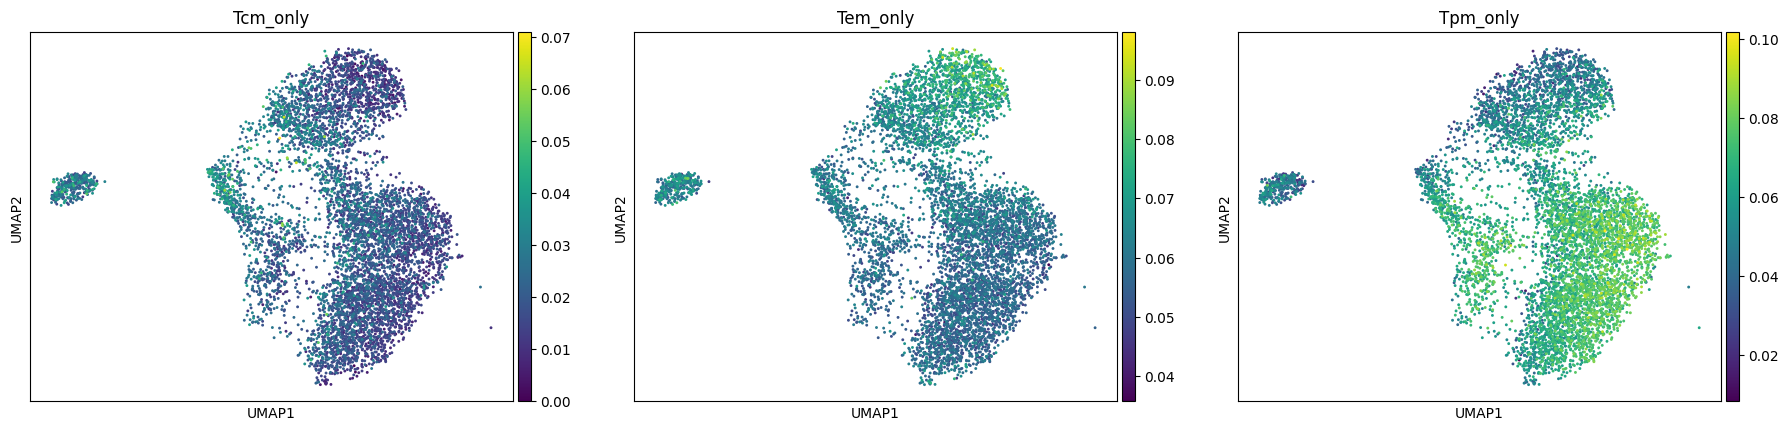

In [35]:
# Plot a UMAP of the aucell results
sc.pl.umap(adata, color=['Tcm_only', 'Tem_only', 'Tpm_only'])

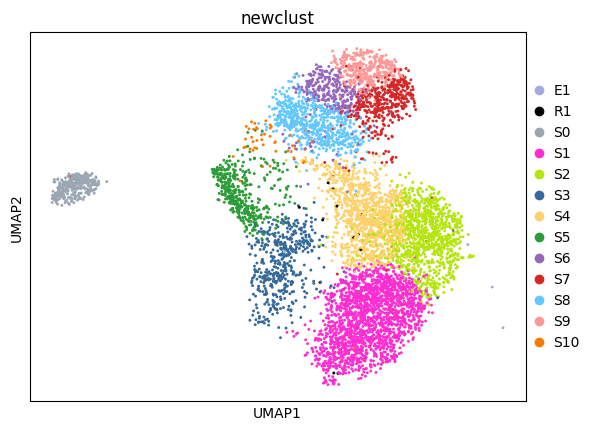

In [36]:
sc.pl.umap(adata, color=['newclust'])